# Assignment 4 Multinomial Logistic Regression
#### Name: Pranisaa Charnparttaravanit
#### ID: st121720

Under this assignment, "orthopedic patients" are being investigated. The aim is to identify the class of the patients; Hernia, Spondylolisthesis and Normal. The features that are being investigated are pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and degree spondylolisthesis. By the the end of the assessment, accuracy of the prediction of this multinomial logistic regression as well as the plots will be shown.  

### Importing libraries

In [2]:
import numpy as np
import pandas as pd 
import random
import math
import matplotlib.pyplot as plt

### Functions

In [3]:
def phi(i, theta, X):
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta,mat_x.T)) #e^theataj * x
    den = 0
    for j in range(0,k):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j,mat_x.T))
    phi_i = num/den
    return phi_i

In [4]:
def indicator(i, j):
    if i == j: return 1 #correct class, return 1 else return 0
    else: return 0

def grad_cost(X, y, j, theta):
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta,X.iloc[i])
        sum = sum + (X.iloc[i] * p)
    grad = -sum/m
    return grad

def gradient_descent(X1,y1,X2,y2, theta, alpha, iters):
    costs_train = []
    costs_test = []
    for iter in range(iters):
        for j in range(0, k):
            theta[j] = theta[j] - alpha * grad_cost(X1, y1, j, theta)
        cost_val_train = cost(X1,y1,theta)
        cost_val_test = cost(X2,y2,theta)
        costs_train.append(cost_val_train)
        costs_test.append(cost_val_test)
    return theta,costs_train,costs_test

def cost(X,y,theta):
    m,n = X.shape
    k= len(set(y))
    sum_cost = 0
    for i in range(0,m):
        for j in range(0,k):
            cost = indicator(y[i],j)*np.log(phi(j,theta,X.iloc[i]))
            sum_cost += cost
    return sum_cost/(-m)
            
def h(X, theta):
    X = np.matrix(X)
    h_matrix = np.empty((k,1))
    den = 0
    for j in range(0,k):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,k):
        h_matrix[i] = math.exp(np.dot(theta[i],X.T))
    h_matrix = h_matrix/den
    return h_matrix

### Importing data

In [5]:
data = pd.read_csv('orthopedic patients.csv')
print(data.head())

m = data.shape[0]
idx = np.arange(0,m)
random.shuffle(idx)
data = data.iloc[idx,:]
data = data.reset_index()

# extract y from data
y_label = 'class';

y =data[y_label];
y=np.array(y)
# print(y)
y_index = data.columns.get_loc(y_label)
# print(y_index)

# extract features from data
X = data.iloc[:,:y_index]
# print(X)

X = X.astype(float)

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  


After the csv file called "orthopedic patients" is imported, target and features are extracted from the data. Lastly, feature data is also converted to float.

### Normalizing data

In [6]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)

X_norm = (X - X_mean)/X_std
# print(X_norm)

### Partitioning the data to training and test sets

Firstly, it is important to separate our data into training and test sets, so that our result can be validated.

In [7]:
m, n = X_norm.shape
idx = np.arange(0,m)
random.shuffle(idx) #shuffling the indices

percent_train = 0.7
m_train = int(m*percent_train)

X_train = X_norm.iloc[0:m_train,0:y_index];
X_test = X_norm.iloc[m_train:,0:y_index];

y_train = y[:m_train];
y_test = y[m_train:];
labels = pd.unique(y)
# print(labels)

# Encode target labels as integers 0..k-1
i = 0
for label in set(y):
    y_train[y_train == label] = i
    y_test[y_test == label] = i
    i = i + 1  

### Check for the missing data

In [8]:
print('Missing values for train data:\n------------------------\n', X_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', X_test.isnull().sum())


Missing values for train data:
------------------------
 index                       0
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
dtype: int64
Missing values for test data 
 ------------------------
 index                       0
pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
dtype: int64


### Adding dummy

In [9]:
# k is the number of unique labels
k = len(set(y))

print(type(X_train))
if (X_train.shape[1] == X_norm.shape[1]): 
    X_train.insert(0, "intercept", 1)
# print(X_train)

if (X_test.shape[1] == X_norm.shape[1]): 
    X_test.insert(0, "intercept", 1)
# print(X_test)

<class 'pandas.core.frame.DataFrame'>


### Initializing theta for each class, theta and cost calculation

In [10]:
# Reset m and n for training data
m, n = X_train.shape

theta_initial = np.ones((k,n))

alpha = .05
iterations = 200

theta,costs_train, costs_test = gradient_descent(X_train,y_train,X_test,y_test, theta_initial, alpha, iterations)

# print(theta)
# print(costs_train)
# print(costs_test)

### Cost plots of training and test data

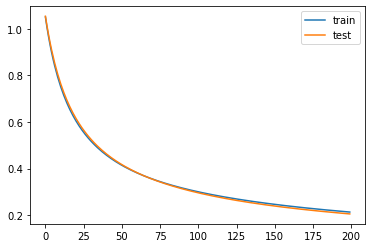

In [11]:
plt.plot(costs_train,label = "train")
plt.plot(costs_test,label = "test")
plt.legend()

### Accuracy calculation

In [12]:
# Reset m and n for train and test data
m,n = X_test.shape
m1,n1 = X_train.shape
# print(m,n,m1,n1)

y_pred = []
for index,row in X_test.iterrows():
    h_matrix = h(row, theta)
    prediction = int(np.where(h_matrix == h_matrix.max())[0])
    y_pred.append(prediction)
        
y_pred_train = []
for index,row in X_train.iterrows():
    h_matrix = h(row, theta)
    prediction = int(np.where(h_matrix == h_matrix.max())[0])
    y_pred_train.append(prediction)
    
# Estimate accuracy of model on train and test data        
correct = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct += +1

correct_train = 0
for i in range(len(y_train)):
    if y_pred_train[i] == y_train[i]:
        correct_train += +1
        
# print(len(y_pred),len(y_pred_train))
# print(correct, correct_train)

accuracy = correct/m
print('Accuracy of test data set: %.4f' % accuracy)

accuracy_train = correct_train/m1
print('Accuracy of train data set: %.4f' % accuracy_train)


Accuracy of test data set: 0.9785
Accuracy of train data set: 0.9447


As shown above, the accuracy of the test set is less than that of the train set. This indicate that over-fitting of the model does not occur

### Plots

The plots below show the result of the model prediction between the two features per plot.
1. The first plot shows the comparison between the real target and the model prediction between the features of pelvic incidence and pelvic tilt.
2. The second plot shows the comparison between the real target and the model prediction between sacral slope and degree spondylolisthesis.
3. The third plot shows the comparison between the real target and the model prediction between lumbar lordosis angle and pelvic radius.

In [13]:
def idx(y_pred,y_test,klass):
    idx_klass_pred =[]
    idx_klass_test = []
    for i in range(len(y_pred)):
        if y_pred[i] == klass:
            idx_klass_pred.append(i)
    for j in range(len(y_test)):
        if y_test[j] == klass:
            idx_klass_test.append(j)
    return idx_klass_pred , idx_klass_test

idx_0_pred, idx_0_test = idx(y_pred,y_test,0)
idx_1_pred, idx_1_test = idx(y_pred,y_test,1)
idx_2_pred, idx_2_test = idx(y_pred,y_test,2)

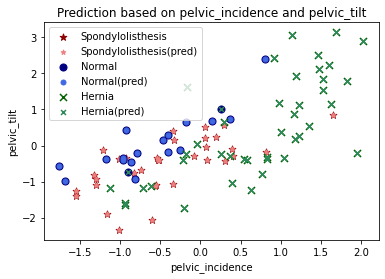

In [14]:
plt.scatter(X_test['pelvic_incidence'].iloc[idx_0_pred],X_test['pelvic_tilt'].iloc[idx_0_pred],s=50, c='darkred', marker='*', label='Spondylolisthesis')
plt.scatter(X_test['pelvic_incidence'].iloc[idx_0_test],X_test['pelvic_tilt'].iloc[idx_0_test],s=25, c='lightcoral', marker='*', label='Spondylolisthesis(pred)')
plt.scatter(X_test['pelvic_incidence'].iloc[idx_1_pred],X_test['pelvic_tilt'].iloc[idx_1_pred],s=50, c='navy', marker='o', label='Normal')
plt.scatter(X_test['pelvic_incidence'].iloc[idx_1_test],X_test['pelvic_tilt'].iloc[idx_1_test],s=25, c='royalblue', marker='o', label='Normal(pred)')
plt.scatter(X_test['pelvic_incidence'].iloc[idx_2_pred],X_test['pelvic_tilt'].iloc[idx_2_pred],s=50, c='darkgreen', marker='x', label='Hernia')
plt.scatter(X_test['pelvic_incidence'].iloc[idx_2_test],X_test['pelvic_tilt'].iloc[idx_2_test],s=25, c='seagreen', marker='x', label='Hernia(pred)')
plt.title("Prediction based on pelvic_incidence and pelvic_tilt")
plt.xlabel('pelvic_incidence')
plt.ylabel('pelvic_tilt')
plt.legend()

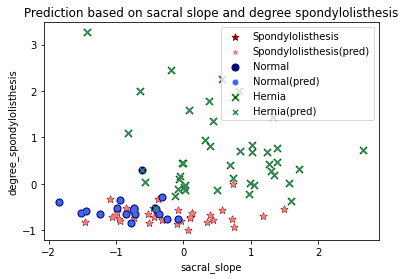

In [15]:
plt.scatter(X_test['sacral_slope'].iloc[idx_0_pred],X_test['degree_spondylolisthesis'].iloc[idx_0_pred],s=50, c='darkred', marker='*', label='Spondylolisthesis')
plt.scatter(X_test['sacral_slope'].iloc[idx_0_test],X_test['degree_spondylolisthesis'].iloc[idx_0_test],s=25, c='lightcoral', marker='*', label='Spondylolisthesis(pred)')
plt.scatter(X_test['sacral_slope'].iloc[idx_1_pred],X_test['degree_spondylolisthesis'].iloc[idx_1_pred],s=50, c='navy', marker='o', label='Normal')
plt.scatter(X_test['sacral_slope'].iloc[idx_1_test],X_test['degree_spondylolisthesis'].iloc[idx_1_test],s=25, c='royalblue', marker='o', label='Normal(pred)')
plt.scatter(X_test['sacral_slope'].iloc[idx_2_pred],X_test['degree_spondylolisthesis'].iloc[idx_2_pred],s=50, c='darkgreen', marker='x', label='Hernia')
plt.scatter(X_test['sacral_slope'].iloc[idx_2_test],X_test['degree_spondylolisthesis'].iloc[idx_2_test],s=25, c='seagreen', marker='x', label='Hernia(pred)')
plt.title("Prediction based on sacral slope and degree spondylolisthesis")
plt.xlabel('sacral_slope')
plt.ylabel('degree_spondylolisthesis')
plt.legend()

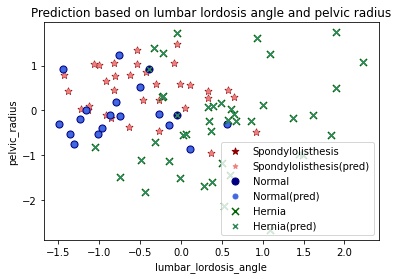

In [16]:
plt.scatter(X_test['lumbar_lordosis_angle'].iloc[idx_0_pred],X_test['pelvic_radius'].iloc[idx_0_pred],s=50, c='darkred', marker='*', label='Spondylolisthesis')
plt.scatter(X_test['lumbar_lordosis_angle'].iloc[idx_0_test],X_test['pelvic_radius'].iloc[idx_0_test],s=25, c='lightcoral', marker='*', label='Spondylolisthesis(pred)')
plt.scatter(X_test['lumbar_lordosis_angle'].iloc[idx_1_pred],X_test['pelvic_radius'].iloc[idx_1_pred],s=50, c='navy', marker='o', label='Normal')
plt.scatter(X_test['lumbar_lordosis_angle'].iloc[idx_1_test],X_test['pelvic_radius'].iloc[idx_1_test],s=25, c='royalblue', marker='o', label='Normal(pred)')
plt.scatter(X_test['lumbar_lordosis_angle'].iloc[idx_2_pred],X_test['pelvic_radius'].iloc[idx_2_pred],s=50, c='darkgreen', marker='x', label='Hernia')
plt.scatter(X_test['lumbar_lordosis_angle'].iloc[idx_2_test],X_test['pelvic_radius'].iloc[idx_2_test],s=25, c='seagreen', marker='x', label='Hernia(pred)')
plt.title("Prediction based on lumbar lordosis angle and pelvic radius")
plt.xlabel('lumbar_lordosis_angle')
plt.ylabel('pelvic_radius')
plt.legend()